# Milestone 2 : Project proposal and initial analyses 🍻

<hr style="clear:both">
This notebook was made for the ADA course at EPFL (CS-401). 

Group : BeerADAventure46

**Authors:** \
[Agatha Hunter](https://people.epfl.ch/agatha.hunter)\
[Anne-Valérie Preto](https://people.epfl.ch/anne-valerie.preto)\
[Tristan Carruzzo](https://people.epfl.ch/tristan.carruzzo)\
[Thamin Maurer](https://people.epfl.ch/thamin.maurer)\
[Victor Dubien](https://people.epfl.ch/victor.dubien)


**Supervisor:**\
[Beatriz Borges](https://people.epfl.ch/beatriz.borges)
<hr style="clear:both">



<blockquote>

## Project proposal  📌

**Influence of the serving style on the tasting profile**:

Goal of the project: Use the textual reviews to find for each beer how it was served (either bottle, can or draft) and find how it influences the tasting profile.

Different serving styles may be adopted in different regions or for different types of beer.  The influence of the serving style could influence not only the appearance, but also the aroma, the palate or the taste.
</blockquote>

### Import libraries

In [1]:
from utils import *

pd.set_option('display.max_columns', None)

## 1. Datasets 📂

### 1.1 Import dataset

In [ ]:
# Firt time imports : 
# Convert txt to csv (function in the utils.py file)

#ratings = convert_txt_to_csv(input_file='ratings.txt', export=True, file_name='ratings')
#reviews = convert_txt_to_csv(input_file='reviews.txt', export=True, file_name='reviews')

In [2]:
# Files already converted, so we can load them directly

reviews = pd.read_csv(dataset_path + 'reviews.csv')
beers = pd.read_csv(dataset_path + 'beers.csv')
breweries = pd.read_csv(dataset_path + 'breweries.csv')
users = pd.read_csv(dataset_path + 'users.csv')

### 1.2 Initial datasets analysis 🔎

#### 1.2.1 Beers dataset 🍺

In [3]:
display(beers.sample(3))
print('Shape of beers : ', beers.shape)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
199924,62981,Hop Dollop,9784,Zero Gravity Craft Brewery / American Flatbread,American Pale Ale (APA),2,2,3.93,NaN,NaN,4.1,3.930000,NaN,0,NaN
203488,257507,Pumpkin Ale,46866,Happy Basset Brewing Company,Pumpkin Ale,1,1,3.99,NaN,NaN,7.5,3.990000,NaN,0,NaN
88730,57865,4th Anniversary Double IPA,13839,Port Brewing,American Double / Imperial IPA,131,95,3.62,82.0,NaN,10.0,3.622748,NaN,0,NaN


Shape of beers :  (280823, 15)


In [4]:
# print the number of beers id and beer name
print('Number of different beers id:', len(beers.beer_id.unique()))
print('Number of different beers name:', len(beers.beer_name.unique()))

Number of different beers id: 280823
Number of different beers name: 236209


<blockquote>

**Initial comments about the dataset**

-Some beers have the same name! In order to avoid confusion, we will drop the column beer_name (and brewery_name) from the dataset.

-As we will not use the RateBeer dataset, we can also drop the column nbr_matched_valid_ratings and avg_matched_valid_ratings.  

-The column bros_score only reflect the ratings from the two creators of the website, so we can also drop it.  

-ba_score represents the percentage (rounded to the tenth for depth) of raters who gave the beer a 3.75 or higher as long as the beers as at least 10 ratings.

</blockquote>

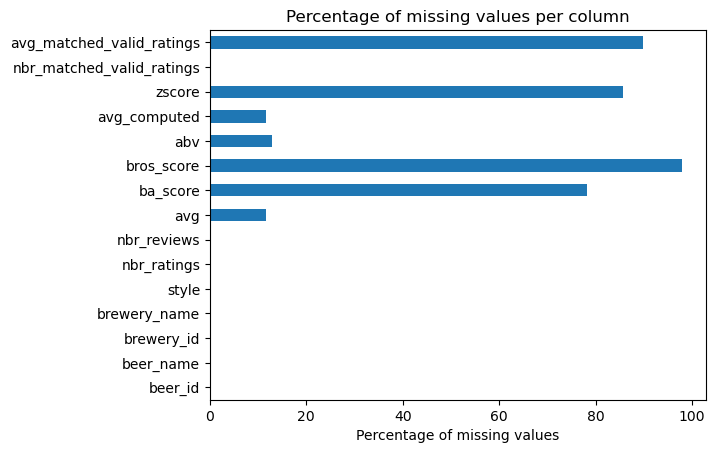

avg                      : 32829 missing values (11.69%)
ba_score                 : 219623 missing values (78.21%)
bros_score               : 275121 missing values (97.97%)
abv                      : 36024 missing values (12.83%)
avg_computed             : 32841 missing values (11.69%)
zscore                   : 240538 missing values (85.65%)
avg_matched_valid_ratings: 252551 missing values (89.93%)


In [5]:
show_missing(beers)

<blockquote>

**More comments about the dataset**

We see that more than 80% of the beers do not have a z-score value. It is something we will need to take into account when we verify if our final dataset if representative. To make sure our final data has the same data distribution, we will re compute the z_score and compare it to this one, or one computed from the initial database.

For now, we can drop this column alongside avg_computed and compute them manually later if needed from the reviews dataset. 

80% of the beers have no ba_score value, so we can also drop it and compute it later if needed.

The other columns with NaN such as avg_matched_valid_ratings, avg_computed or bros_score are not usefull in our analysis since we only look at the BeerAdvocate reviews.

However, the abv, which represents the alcohol percentage in a beer, is missing for approximately 12%.

</blockquote>

In [6]:
beers_filtered = beers.drop(columns=['beer_name', 
                            'brewery_name',
                            'bros_score',
                            'ba_score',
                            'nbr_matched_valid_ratings',
                            'avg_matched_valid_ratings',
                            'zscore',
                            'avg_computed']).copy(deep=True)

beers_filtered.rename(columns={'nbr_ratings': 'beer_nbr_ratings',
                               'nbr_reviews': 'beer_nbr_reviews'}, inplace=True)

In [7]:
beers_filtered.sample(3)

,beer_id,brewery_id,style,beer_nbr_ratings,beer_nbr_reviews,avg,abv
59555,182838,9854,American Pale Ale (APA),21,7,3.93,5.2
53032,291590,16519,Altbier,1,0,3.50,NaN
144335,291833,39864,English Bitter,1,1,4.64,5.5


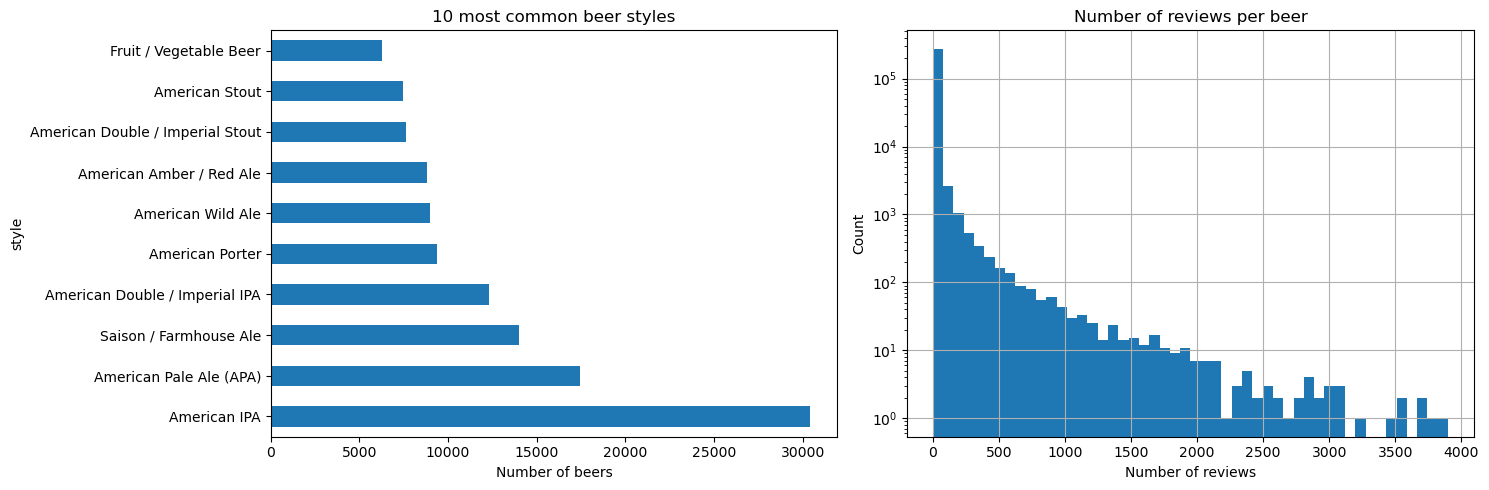

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
beers_filtered['style'].value_counts(normalize=False).head(10).plot(kind='barh', title='10 most common beer styles')
plt.xlabel('Number of beers')
plt.subplot(1, 2, 2)
beers_filtered['beer_nbr_reviews'].hist(bins=50,log=True)
plt.title('Number of reviews per beer')
plt.ylabel('Count')
plt.xlabel('Number of reviews')
plt.tight_layout()
plt.show()

/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


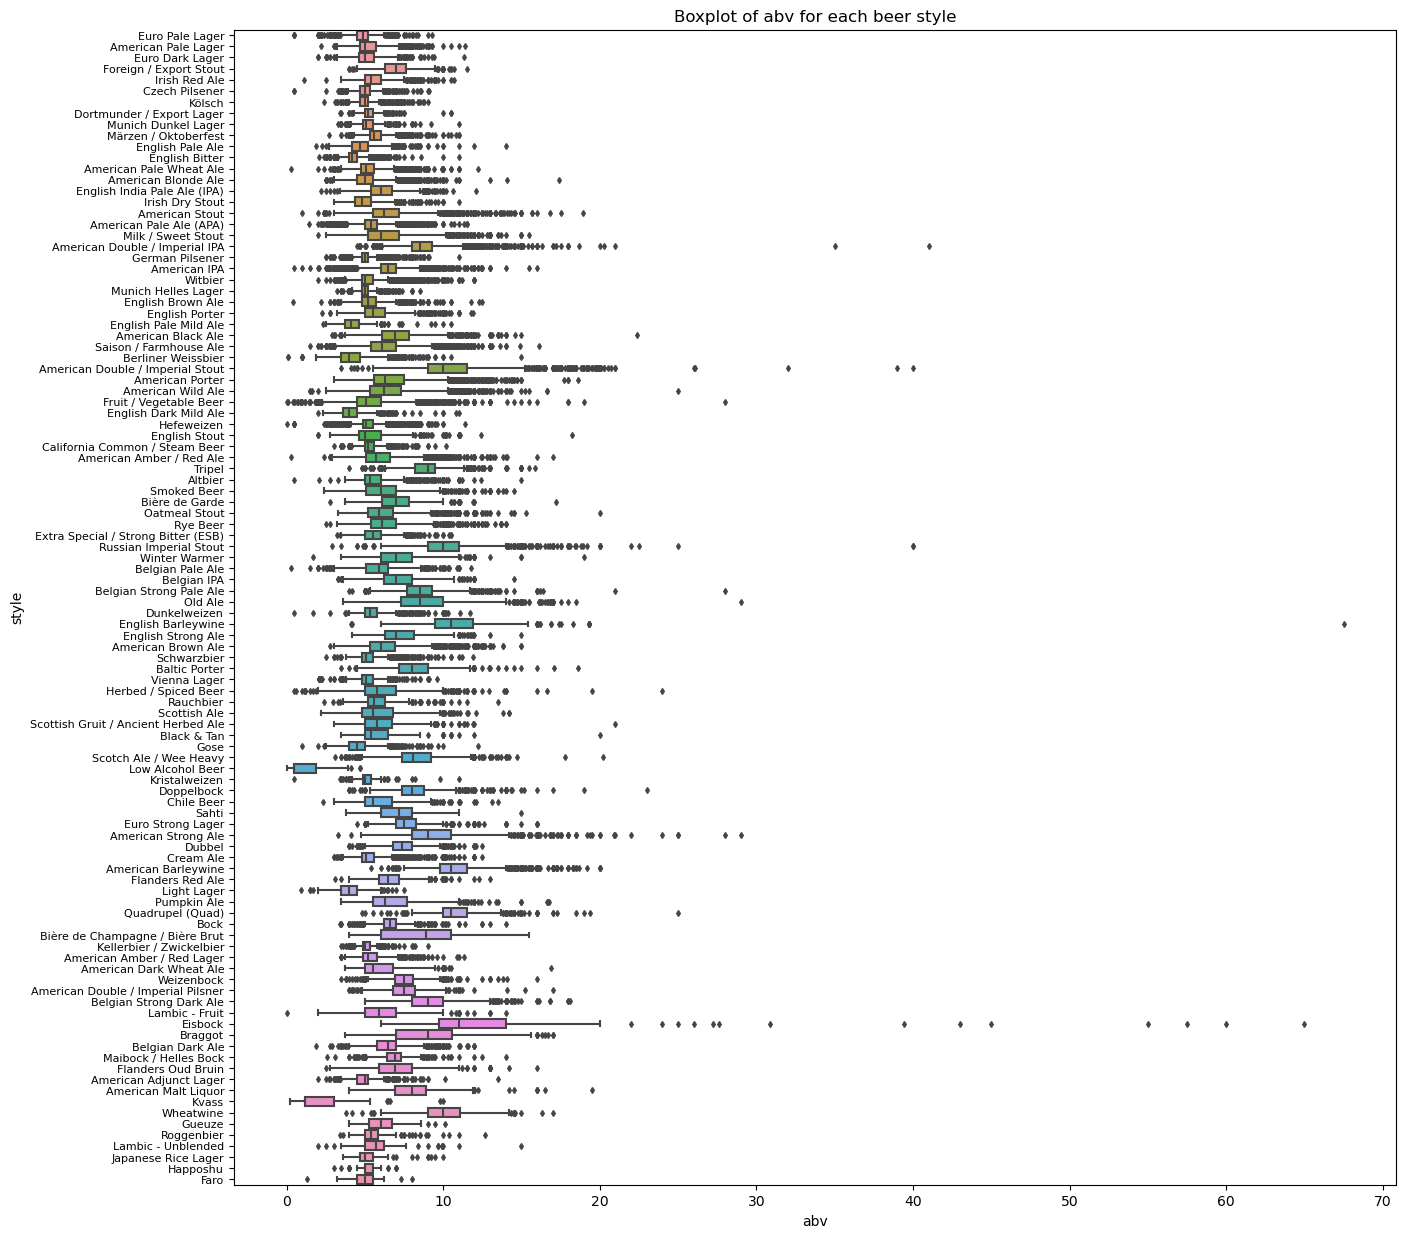

In [9]:
# show boxplot of abv for each beer style
plt.figure(figsize=(15, 15))
sns.boxplot(y='style', x='abv', data=beers_filtered, fliersize=3)
plt.yticks(fontsize=8)
plt.title('Boxplot of abv for each beer style')
plt.show()

In [10]:
# group the beers by style and compute the median of abv for each style
median_abv_by_style = beers_filtered.groupby('style')['abv'].median()
# display(median_abv_by_style.sample(3))

# fill the missing abv values with the median of abv for the style of each beer
beers_filtered['abv'] = beers_filtered.apply(lambda x: median_abv_by_style[x['style']] if pd.isna(x['abv']) else x['abv'], axis=1)

In [11]:
beers_filtered.describe()

,beer_id,brewery_id,beer_nbr_ratings,beer_nbr_reviews,avg,abv
count,280823.000000,280823.000000,280823.000000,280823.000000,247994.000000,280823.000000
mean,148556.817141,21335.895860,29.887267,9.221417,3.721034,6.434481
std,84307.593397,15385.715656,231.010063,68.866445,0.476003,1.984850
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,76513.500000,3835.000000,1.000000,0.000000,3.500000,5.000000
50%,148867.000000,24075.000000,2.000000,1.000000,3.780000,6.000000
75%,221817.500000,33960.000000,8.000000,2.000000,4.010000,7.300000
max,293296.000000,49817.000000,16509.000000,3899.000000,5.000000,67.500000


<blockquote>

We are left with a dataset containing 280823 beers. We are only missing some values for avg as some beers do not have any ratings/reviews. They will be removed later when merging with the reviews dataset anyway.

</blockquote>

#### 1.2.2 Breweries dataset 🏭

In [12]:
display(breweries.sample(3))
print('Shape of breweries : ', breweries.shape)

,id,location,name,nbr_beers
12544,46099,"United States, Florida",Amelia Tavern Restaurant & Brewpub,0
2525,41561,Japan,Harvest No Oka,3
11452,48075,"United States, Missouri",Bluewood Brewing,1


Shape of breweries :  (16758, 4)


In [13]:
# show the missing values
show_missing(breweries)

There are no missing values in this dataset.


<blockquote>

This dataset has no missing values, we will simply rename the columns and drop the brewery name.

</blockquote>

In [14]:
breweries_filtered = breweries.drop(columns=['name']).copy(deep=True)

breweries_filtered.rename(columns={'id':'brewery_id',
                                   'location':'brewery_location',
                                   'nbr_beers':'brewery_nbr_beers'}, inplace=True)

In [15]:
breweries_filtered.sample(3)

,brewery_id,brewery_location,brewery_nbr_beers
12175,29984,"United States, Wyoming",24
10111,41719,"United States, Colorado",63
6806,14613,South Africa,0


In [16]:
# Some breweries have weird location values, they contain google maps links. All the breweries with a weird location value are in the US.
print('Number of breweries with a weird location value:', len(breweries_filtered[breweries_filtered['brewery_location'].str.contains('<', na=False)]))

# for loc in breweries_filtered[breweries_filtered['brewery_location'].str.contains('<', na=False)]['brewery_location'].unique():
#     print(loc) # print the strange values

Number of breweries with a weird location value: 35


In [17]:
# manually adding the location for those 35 breweries

#obtain the brewery_id of the 35 breweries
strange_id = breweries_filtered[breweries_filtered['brewery_location'].str.contains('<', na=False)]['brewery_id'].unique()

# create a dic with the brewery_id as key and unknwon as value
dic = {}
for i in strange_id:
    dic[i] = 'unknown'
    
# function that takes as input the brewery_id and a location and change the location of the brewery with the given id in the dictionary dic 
def change_location(brewery_id, us_state):
    location = 'United States, ' + us_state
    dic[brewery_id] = location

In [18]:
# take the first element of dic that has value unknown and print its location
for key, value in dic.items():
    if value == 'unknown':
        print('Brewery id:', key)
        print('Strange location:',breweries_filtered[breweries_filtered['brewery_id'] == key]['brewery_location'].values[0])        
        break

Brewery id: 2434
Strange location: United States</a> | <a href="http://maps.google.com/maps?oi=map&q=%2C+US" target="_blank">map</a><br><a href="http://bluecorncafe.com" target="_blank">bluecorncafe.com


In [19]:
#Changing the location in dic

change_location(brewery_id=2434,us_state='New Mexico')
change_location(brewery_id=2730,us_state='Wisconsin')
change_location(brewery_id=1551,us_state='California')
change_location(brewery_id=1552,us_state='Michigan')
change_location(brewery_id=2710,us_state='California')
change_location(brewery_id=3681,us_state='Ohio')
change_location(brewery_id=2413,us_state='California')
change_location(brewery_id=1793,us_state='Virginia')
change_location(brewery_id=6045,us_state='New Jersey')
change_location(brewery_id=2776,us_state='New York')
change_location(brewery_id=1751,us_state='Texas')
change_location(brewery_id=1554,us_state='Georgia')
change_location(brewery_id=1961,us_state='Maine')
change_location(brewery_id=4927,us_state='South Carolina')
change_location(brewery_id=23973,us_state='Maine')
change_location(brewery_id=2512,us_state='California')
change_location(brewery_id=6416,us_state='New Jersey')
change_location(brewery_id=2104,us_state='Oregon')
change_location(brewery_id=3079,us_state='Washington')
change_location(brewery_id=2410,us_state='Michigan')
change_location(brewery_id=1931,us_state='Ohio')
change_location(brewery_id=1553,us_state='Maine')
change_location(brewery_id=1550,us_state='Colorado')
change_location(brewery_id=32764,us_state='Illinois')
change_location(brewery_id=8451,us_state='Wyoming')
change_location(brewery_id=5114,us_state='California')
change_location(brewery_id=1802,us_state='North Carolina')
change_location(brewery_id=1819,us_state='Minnesota')
change_location(brewery_id=200,us_state='California')
change_location(brewery_id=918,us_state='Florida')
change_location(brewery_id=4343,us_state='California')
change_location(brewery_id=9765,us_state='New York')
change_location(brewery_id=1927,us_state='Colorado')
change_location(brewery_id=28908,us_state='Utah')
change_location(brewery_id=70,us_state='Oregon')
change_location(brewery_id=1567,us_state='Hawaii')

In [20]:
# change the location of the breweries in the breweries_filtered dataframe
for key, value in dic.items():
    breweries_filtered.loc[breweries_filtered['brewery_id'] == key, 'brewery_location'] = value

In [21]:
# how many different locations are there that contain United States
print('Number of different locations that contain United States:', len(breweries_filtered[breweries_filtered['brewery_location'].str.contains('United States')]['brewery_location'].unique()))

Number of different locations that contain United States: 50


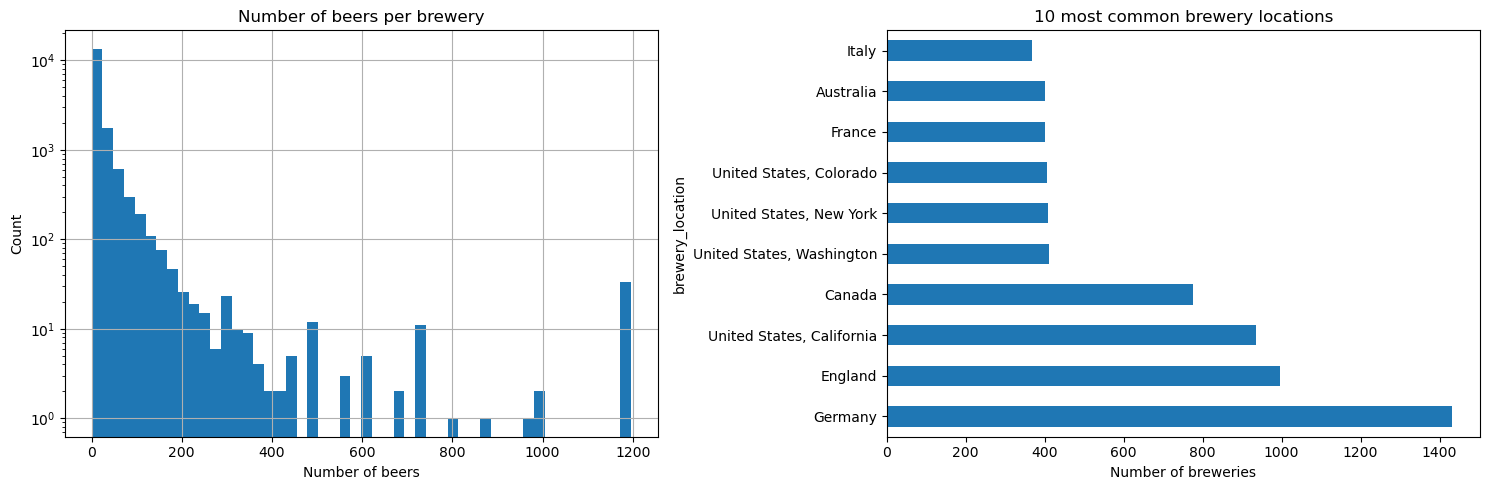

In [22]:
# Representation of beers per brewery and most common brewery locations
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
breweries_filtered['brewery_nbr_beers'].hist(bins=50, log=True)
plt.title('Number of beers per brewery')
plt.ylabel('Count')
plt.xlabel('Number of beers')
plt.subplot(1, 2, 2)
breweries_filtered['brewery_location'].value_counts(normalize=False).head(10).plot(kind='barh', title='10 most common brewery locations')
plt.xlabel('Number of breweries')
plt.tight_layout()
plt.show()

#### 1.2.3 Users dataset 👤

In [23]:
display(users.sample(3))
print('Shape of users : ', users.shape)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
125190,6,1,andyf847.21783,andyf847,1.117620e+09,"United States, Illinois"
40055,8,7,skullfission.9548,SkullFission,1.098353e+09,"United States, Florida"
65769,1,0,jcsrobinson.888847,jcsrobinson,1.415272e+09,"United States, Missouri"


Shape of users :  (153704, 6)


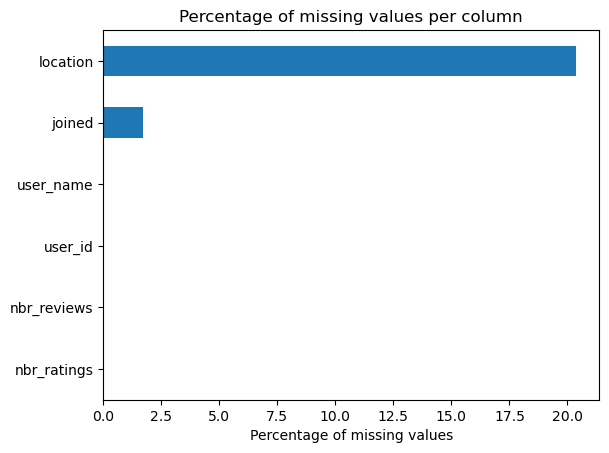

user_name                :     1 missing values (0.00%)
joined                   :  2652 missing values (1.73%)
location                 : 31279 missing values (20.35%)


In [24]:
show_missing(users)

<blockquote>

We are only missing information about when the user joined the website and locations. (and 1 username, which we drop anyway)

</blockquote>

In [25]:
users_filtered = users.drop(columns=['user_name']).copy(deep=True)

users_filtered.rename(columns={'nbr_ratings':'user_nbr_ratings',
                               'nbr_reviews':'user_nbr_reviews',
                               'joined':'user_joined',
                               'location':'user_location'}, inplace=True)

users_filtered.sample(3)

,user_nbr_ratings,user_nbr_reviews,user_id,user_joined,user_location
6002,454,452,fish113d.3754,1.069672e+09,"United States, Pennsylvania"
120238,1,0,tjs1993.902294,1.417518e+09,"United States, Rhode Island"
109915,7,0,tmartin.884751,1.414580e+09,NaN


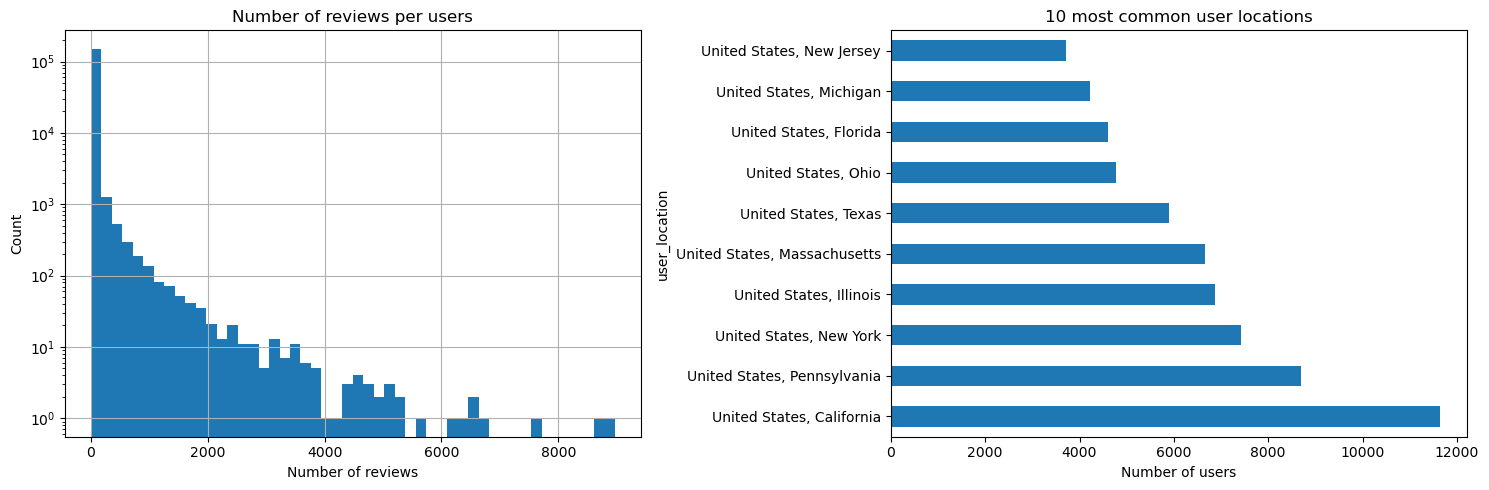

In [28]:
# Representation of reviews per user and most common user locations
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
users_filtered['user_nbr_reviews'].hist(bins=50, log=True)
plt.title('Number of reviews per users')
plt.ylabel('Count')
plt.xlabel('Number of reviews')
plt.subplot(1, 2, 2)
users_filtered['user_location'].value_counts(normalize=False).head(10).plot(kind='barh', title='10 most common user locations')
plt.xlabel('Number of users')
plt.tight_layout()
plt.show()

<blockquote>

We observe that many users have no reviews at all, they will be removed from the dataset when merging. Also, the 10 most common user location are all in the US.

</blockquote>

#### 1.2.4 Reviews dataset 📝

In [29]:
display(reviews.sample(3))
print('Shape of reviews : ', reviews.shape)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
1766630,Schadenfreude,57458,Surly Brewing Co. Beer Hall,13014,Munich Dunkel Lager,5.0,1307872800,woodychandler,woodychandler.5708,4.5,4.0,3.5,4.00,4.00,3.98,Transcribed from undated notes. Had on-tap at ...
1203558,2XIPA,57908,Southern Tier Brewing Company,3818,American Double / Imperial IPA,8.2,1336039200,Dave128,dave128.485900,4.0,4.0,4.5,4.50,4.50,4.35,Enjoyed on tap at mellow mushroom in Lexington...
829490,Saison Tart,95414,Green Flash Brewing Co.,2743,Berliner Weissbier,3.6,1378634400,beertunes,beertunes.160720,3.5,2.5,2.5,2.75,2.75,2.71,Served in 10oz tulip. Poured a semi-hazy pale ...


Shape of reviews :  (2589586, 16)


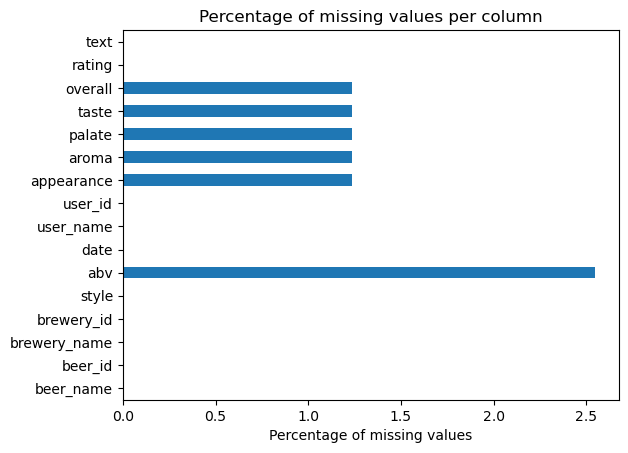

abv                      : 65983 missing values (2.55%)
user_name                :     3 missing values (0.00%)
appearance               : 32009 missing values (1.24%)
aroma                    : 32009 missing values (1.24%)
palate                   : 32009 missing values (1.24%)
taste                    : 32009 missing values (1.24%)
overall                  : 32009 missing values (1.24%)
text                     :     2 missing values (0.00%)


In [30]:
show_missing(reviews)

In [31]:
# making sure that all the missing values of the rating aspects are in the same rows

# print the number of rows that contains a NaN value for each column ['overall', 'taste', 'palate', 'aroma', 'appearance']
print('Number of rows with NaN values for each column :')
for col in ['overall', 'taste', 'palate', 'aroma', 'appearance']:
    print(col, ':', len(reviews[reviews[col].isna()]))
    
print()
# print the number of rows that contains a NaN value for all the rating aspects
missing_values = reviews[['overall', 'taste', 'palate', 'aroma', 'appearance']].isna()
missing_values['all_missing'] = missing_values.all(axis=1)
print(missing_values['all_missing'].value_counts())

Number of rows with NaN values for each column :
overall : 32009
taste : 32009
palate : 32009
aroma : 32009
appearance : 32009

all_missing
False    2557577
True       32009
Name: count, dtype: int64


<blockquote>

All the missing values are in the same rows, and they represent less than 1.5% of the dataset. We can drop them.

</blockquote>

In [32]:
# remove the columns that are not useful for our analysis
reviews_filtered = reviews.drop(columns=['user_name', 'beer_name', 'brewery_name']).copy(deep=True)

# remove the column abv because we have the information in the beers dataframe
reviews_filtered.drop(columns=['abv'], inplace=True)

#remove rows in reviews_filtered that have all_missing True in missing_values
reviews_filtered = reviews_filtered[~missing_values['all_missing']].copy(deep=True)

#remove the two reviews that have no text
reviews_filtered = reviews_filtered[~reviews_filtered['text'].isna()].copy(deep=True)

display(reviews_filtered.sample(3))
print('Shape of reviews_filtered : ', reviews_filtered.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text
639678,38180,2210,American IPA,1364122800,jaz58.54864,4.50,4.5,4.5,4.50,4.50,4.50,I'm a big fan of IPA's and this is a classic.E...
413455,703,240,Irish Dry Stout,1082628000,badbadger.5638,4.00,3.5,3.5,3.50,3.50,3.53,14.9 FL. OZ. with draughtflow device.Nice off-...
2317802,48824,1146,Saison / Farmhouse Ale,1435917600,leantom.638426,3.75,4.5,4.5,4.25,4.25,4.31,Very good Belgian ale. Here goes:A: Hazy gol...


Shape of reviews_filtered :  (2557575, 12)


In [33]:
show_missing(reviews_filtered)

There are no missing values in this dataset.


/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

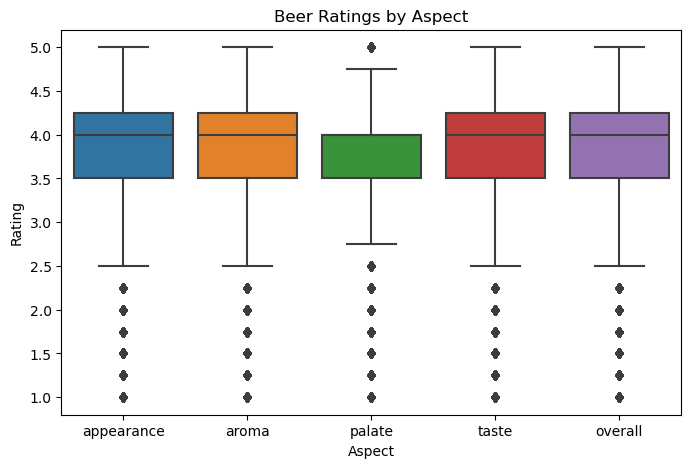

In [35]:
# show boxplot for each rating column, appearance, aroma, palate, taste and overall

plt.figure(figsize=(8, 5))
sns.boxplot(data=reviews_filtered[['appearance', 'aroma', 'palate', 'taste', 'overall']])
plt.title('Beer Ratings by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Rating')
plt.show()

### 1.3 Merge datasets 🔗

In [36]:
# Merge reviews with users and beers and breweries
df_merged = reviews_filtered.merge(beers_filtered, how='left', on=['beer_id', 'brewery_id', 'style'])
df_merged = df_merged.merge(users_filtered, how='left', on='user_id')
df_merged = df_merged.merge(breweries_filtered, how='left', on='brewery_id')

display(df_merged.sample(1))
print('Shape of df_merged : ', df_merged.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers
1195341,43739,3818,American Strong Ale,1234782000,reagan1984.219872,4.0,4.0,4.0,4.5,4.5,4.3,Bright copper/amber colored beer. Really brigh...,308,226,3.77,11.0,1892,1409,1.210846e+09,"United States, Massachusetts","United States, New York",145


Shape of df_merged :  (2557575, 22)


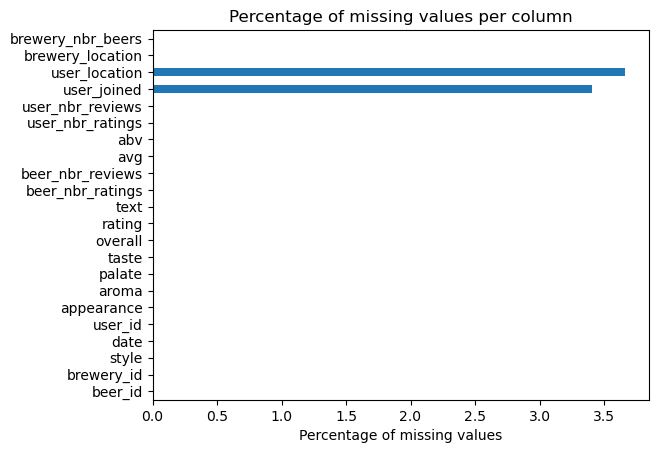

user_joined              : 87150 missing values (3.41%)
user_location            : 93668 missing values (3.66%)


In [37]:
show_missing(df_merged)

In [38]:
# We can replace missing user_joined values with the date of the first review of the user
df_merged['first_review'] = df_merged.groupby('user_id')['date'].transform('min')
df_merged['user_joined'] = df_merged['user_joined'].fillna(df_merged['first_review'])
df_merged.drop(columns=['first_review'], inplace=True)

> We have a complete dataset. Only information about the location of users is missing for 3.66% reviews.

In [ ]:
# Save to csv
# df_merged.to_csv(dataset_path + 'BeerAdvocateMerged.csv', index=False)

## 2. Data enrichment 🍺

In [39]:
df = pd.read_csv(dataset_path + 'BeerAdvocateMerged.csv')

In [40]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers
555381,26091,112,American Stout,1282989600,silentjay.270835,3.0,4.00,3.0,3.5,3.5,3.54,pours surprisingly translucent. dark brown wit...,186,155,3.83,5.7,754,693,1.250676e+09,NaN,"United States, California",52
2428496,87999,201,Belgian Strong Pale Ale,1374832800,dovalihops.393954,4.0,4.75,4.5,4.5,4.5,4.53,Finally popped open one of my bottles. Pours a...,200,38,4.33,12.0,964,935,1.258369e+09,"United States, California",Belgium,38
1914117,16655,4,Quadrupel (Quad),1153648800,evilkeith.53115,3.5,4.00,3.5,3.5,3.5,3.62,Poured a hazed dark amber color witha light bi...,995,463,4.07,10.0,242,241,1.133608e+09,"United States, Alabama","United States, Maine",150


Shape of df :  (2557575, 22)


### 2.1 Serving style 🍾🥤🚰

#### 2.1.1 naive approach

>Since our goal is to look at the influence of the serving style, we need to know how each beer was served.   
A first idea was to use a naive approach. We only look at whether a word specific to as service style has been used. 

In [41]:
def serving_type_naive(df):
    """
    Create a new column serving_type_naive that contains the serving type of the beer using the naive approach.
    """
    # Create 3 different columns according to the text review, "bottle", "can", "draft"
    bottle = {'bottle', 'bottled', 'bottles', 'bomber'}
    can = {'can', 'canned', 'cans', }
    draft = {'draft', 'draught', 'tap', 'taps', 'cask', 'growler', 'keg'}
    
    # Create different columns if review text contains the word
    df['bottle'] = df['text'].astype(str).apply(lambda x: any(ele in x.lower() for ele in bottle))
    df['can'] = df['text'].astype(str).apply(lambda x: any(ele in x.lower() for ele in can))
    df['draft'] = df['text'].astype(str).apply(lambda x: any(ele in x.lower() for ele in draft))
    
    # if there are more than one true or no true, set the value to 'unknown'
    df.loc[df[['bottle', 'can', 'draft']].sum(axis=1) != 1, 'serving_type_naive'] = 'unknown'

    # drop the columns bottle, can and draft
    df.drop(['bottle', 'can', 'draft'], axis=1, inplace=True)
    return df

#### 2.1.2 Similarity 🍾🥤🚰

> Compute the similarity between the reviews and a list of words specific to each serving style. The list is more exhaustive in this method, using words such as aluminium or cork for can and bottle respectively. Select the serving style with the highest similarity.

In [42]:
def serving_type_sim(df, word_bottle='data/bottle.txt', word_can='data/can.txt', word_draft='data/draft.txt', threshold=0.5):
    """
    Compute the cosine similarity between the review text and the list of words for each serving type. Select the serving type with the highest similarity score.
    """
    # Read the list of words from the text file
    with open(word_can, 'r') as file:
        word_can = file.read().splitlines()

    with open(word_bottle, 'r') as file:
        word_bottle = file.read().splitlines()

    with open(word_draft, 'r') as file:
        word_draft = file.read().splitlines()

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # Transform the review and words list using TF-IDF
    tfidf_matrix = vectorizer.fit_transform(df['text'].astype(str))

    can_vector = vectorizer.transform([" ".join(word_can)])
    bottle_vector = vectorizer.transform([" ".join(word_bottle)])
    draft_vector = vectorizer.transform([" ".join(word_draft)])

    # Calculate the cosine similarity
    cosine_sim_can = cosine_similarity(tfidf_matrix, can_vector)
    cosine_sim_bottle = cosine_similarity(tfidf_matrix, bottle_vector)
    cosine_sim_draft = cosine_similarity(tfidf_matrix, draft_vector)

    # Get the maximum similarity score and corresponding serving type
    max_sim = np.maximum.reduce([cosine_sim_bottle, cosine_sim_can, cosine_sim_draft])
    serving_type = np.where(max_sim >= threshold, np.array(['bottle', 'can', 'draft'])[np.argmax([cosine_sim_bottle, cosine_sim_can, cosine_sim_draft], axis=0)], 'unknown')

    # Add the serving_type_sim column to the dataframe
    df['serving_type_sim'] = serving_type

    return df

#### 2.1.3 Rule-based approach 🍾🥤🚰

> Homemade algorithm used to find the serving type using a rule-based approach.

In [43]:
nlp = spacy.load("en_core_web_sm")

def differentiate_can(doc):
    """
    Differentiate between the noun and verb form of the word "can" in the review text.
    """
    verbes_nom = []
    for token in doc:
        if token.text.lower() == "can" and any(t.dep_ == "aux" for t in token.head.children):
            verbes_nom.append("verb")
        elif token.text.lower() == "can":
            verbes_nom.append("noun")

    return verbes_nom

def remove_conditional(doc):
    """
    Remove parts of the review text that are in the conditional form.
    """
    modified_tokens = []
    remove_sentence = False

    for sent in doc.sents:
        for token in sent:
            if remove_sentence:
                continue
            if token.text.lower() in {"would", "could", "'d"}:
                subtree = [t.text for t in token.subtree]
                modified_tokens.extend(subtree[:-1])
                remove_sentence = True
            else:
                modified_tokens.append(token.text)

    modified_text = " ".join(modified_tokens)

    return nlp(modified_text)

def extract_serving_style(review):
    """
    Return the serving style of the beer using the rule-based approach.
    """
    bottle = {'bottle', 'bottled', 'bottles', 'bomber'}
    can = {'can', 'canned', 'cans'}
    draft = {'draft', 'draught', 'tap', 'taps', 'cask', 'growler'}

    # modified_doc = remove_conditional(nlp(review))
    modified_doc = nlp(review)

    serving_styles = set()

    if any(word in modified_doc.text.lower() for word in bottle):
        serving_styles.add("bottle")
    if any(word in modified_doc.text.lower() for word in can) and "noun" in differentiate_can(modified_doc):
        serving_styles.add("can")
    if any(word in modified_doc.text.lower() for word in draft):
        serving_styles.add("draft")

    serving_style = serving_styles.pop() if len(serving_styles) == 1 else 'unknown'

    return serving_style

def process_row(row):
    serving_style = extract_serving_style(row.text)
    return serving_style

def serving_type_rulebased(df):
    # Number of threads to run in parallel (adjust based on your system)
    num_threads = 6
    
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        # Apply the function in parallel to each row of the DataFrame
        results = list(tqdm(executor.map(process_row, df.itertuples(index=False)), total=len(df)))

    # Add the results to the DataFrame
    df['serving_type_rulebased'] = results
    
    return df

#### 2.1.4 Test on sample df

<blockquote>

To test which method performed best to retrieve the serving style of a beer, we manually labelled 250 reviews sampled randomly on the merged dataset. Each member of the group labelled 50 reviews as "unknown", "draft", "can" or "bottle".<break>


The goal was to learn more about the reviews, and find pattern that could help us for the rule-based method. After a few reviews, we added some words related to draft for example.


</blockquote>

##### 2.1.4.1 Obtain a df with true serving types

In [44]:
#250 reviews for function evaluation (manually labelled)
df_eval = df.sample(n=250, random_state=46).copy(deep=True)
df_eval['true_serving_type'] = 'not_set'

In [45]:
df_eval['true_serving_type'].value_counts()

true_serving_type
not_set    250
Name: count, dtype: int64

In [47]:
# Function used to display a review and label the serving style
#idx = display_review(df_eval)
#df_eval = update_review_serving_type(df_eval, idx)

In [48]:
# df_eval.to_csv('data/BeerAdvocateEval.csv', index=False)
df_eval = pd.read_csv('data/BeerAdvocateEval.csv')

In [49]:
# Distribution of the serving types in the evaluation set
df_eval['true_serving_type'].value_counts()

true_serving_type
unknown    141
bottle      82
draft       20
can          7
Name: count, dtype: int64

##### 2.1.4.2 Call each function and evaluate (time and accuracy)

In [50]:
display(df_eval.sample(3))

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,true_serving_type
87,25353,147,American Strong Ale,1146564000,mochunk.29716,4.0,4.0,3.5,4.5,3.5,4.05,Poured from a bomber into pint glass. 9th Anni...,254,217,3.83,7.8,11,11,1.121681e+09,"United States, Illinois","United States, California",671,bottle
65,38470,147,American Black Ale,1190196000,doomcifer.48386,4.0,5.0,4.0,5.0,4.0,4.64,Appearance - pours a very dark brew with a nic...,5924,1913,4.20,8.7,1425,371,1.131707e+09,"United States, Rhode Island","United States, California",671,bottle
135,76891,8,Saison / Farmhouse Ale,1328439600,wetpaperbag.152991,4.0,4.0,4.0,4.0,4.0,4.00,A- Similar to that of an amber or copper ale. ...,268,117,3.41,5.5,524,439,1.187086e+09,"United States, Washington","United States, Oregon",186,unknown


In [45]:
t1 = time.time()
df_eval = serving_type_naive(df_eval)
t_naive = time.time() - t1
print(f"Naive method took {t_naive} seconds")

print('Naive method accuracy:', compute_accuracy(df_eval['serving_type_naive'], df_eval['true_serving_type']))

Naive method took 0.014672040939331055 seconds
correct_count : 114, total_count : 250
Naive method accuracy: 0.456


/var/folders/dx/fxbgm6y12kg1c2d5nhl465m40000gn/T/ipykernel_62710/1852602096.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df[['bottle', 'can', 'draft']].sum(axis=1) != 1, 'serving_type_naive'] = 'unknown'


In [46]:
t1 = time.time()
df_eval = serving_type_sim(df_eval)
t_sim = time.time() - t1
print(f"Similarity method took {t_sim} seconds")

print('Similarity method accuracy:', compute_accuracy(df_eval['serving_type_sim'], df_eval['true_serving_type']))

Similarity method took 0.05689096450805664 seconds
correct_count : 141, total_count : 250
Similarity method accuracy: 0.564


In [47]:
t1 = time.time()
df_eval = serving_type_rulebased(df_eval)
t_rulebased = time.time() - t1
print(f"Rulebased method took {t_rulebased} seconds")

print('Rulebased method accuracy:', compute_accuracy(df_eval['serving_type_rulebased'], df_eval['true_serving_type']))

100%|██████████| 250/250 [00:02<00:00, 94.53it/s] 

Rulebased method took 2.7671029567718506 seconds
correct_count : 224, total_count : 250
Rulebased method accuracy: 0.896


In [50]:
#print one random misidentified review
df_misclassified = df_eval[df_eval['serving_type_rulebased'] != df_eval['true_serving_type']].copy(deep=True)
for index, row in df_misclassified.sample(1).iterrows():
    print(f"Review {index}:\n{row['text']}\nRule-based serving type: {row['serving_type_rulebased']}\nTrue serving type: {row['true_serving_type']}\n")

Review 93:
Pours a slightly hazy dark yellow with a significant head that leaves a lot of lacing on the drink down. The mouthfeel is in line with other wheat beers. This is a really easy drinker with a lower ABV. It is out now in 12 pack cos and bottles but I do like the cans. It seems right in line with some of the other hoppy wheat beers like the one's from SN and Boulevard.
Rule-based serving type: bottle
True serving type: unknown



> It is quite clear that the rulebased method is the best one. It takes longer to run, but the accuracy gain is worth it. We will use this method to classify the reviews between the 3 serving styles.

In [ ]:
# Classification of serving type on the whole dataset
#### 8h run-time
# df = serving_type_rulebased(df)

### 2.2 Sentiment analysis 📝

In [ ]:
df = sentiment_analysis(df)

In [51]:
# df.to_csv(dataset_path + 'BA_sentiment.csv', index=False)
df = pd.read_csv(dataset_path + 'BA_sentiment.csv')

In [52]:
df.sample(3)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,serving_type_rulebased,polarity,subjectivity
303762,71743,978,Belgian Strong Dark Ale,1327921200,mactrail.311921,4.00,4.00,3.50,4.0,4.00,3.95,Lovely dark amber in the tall chalice. Very ni...,52,20,3.39,8.0,5058,5030,1.237892e+09,"United States, Washington","United States, California",51,bottle,0.191333,0.521667
917970,17,8,Hefeweizen,1122458400,bigredn.3982,3.50,3.00,3.50,3.0,4.00,3.28,Had this on tap tonight at a bar near me that ...,2117,803,3.25,4.9,415,405,1.071313e+09,"United States, Nebraska","United States, Oregon",186,draft,0.020042,0.500062
483196,111501,702,American Pale Ale (APA),1404468000,darkmagus82.484016,2.75,3.25,4.25,4.0,3.75,3.72,Poured from bottle into a pint glassAppearance...,21,4,3.57,6.0,2425,2320,1.280052e+09,"United States, Virginia","United States, New York",49,bottle,0.332506,0.593346


### 2.3 Readability score 📖

In [ ]:
df = compute_readability(df)

In [63]:
# df.to_csv(dataset_path + 'BA_readability.csv', index=False)
df = pd.read_csv(dataset_path + 'BA_readability.csv')

In [64]:
df.sample(3)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,serving_type_rulebased,polarity,subjectivity,readability_score
547698,26234,29,Pumpkin Ale,1222682400,patrickjr.213570,3.50,4.00,2.5,3.0,3.50,3.32,Poured from a 12 oz bottle into nonic pint gla...,416,333,3.10,5.5,631,631,1.208772e+09,"United States, North Carolina","United States, Missouri",185,bottle,0.038839,0.569196,74.79
472558,22196,10607,Belgian Strong Pale Ale,1430388000,infinitebruner.806193,3.75,3.75,3.5,3.5,3.75,3.63,"April 25, 201512 oz. can, tulipA – Deep amber,...",320,81,3.93,8.0,355,354,1.402740e+09,"United States, Arkansas","United States, New York",307,can,0.157745,0.571863,79.67
543187,1543,418,Extra Special / Strong Bitter (ESB),1183111200,bluegrassbrew.101946,3.50,3.00,3.0,3.5,4.00,3.43,12oz bottle into a pint glass.Pours a dark cop...,2139,700,3.70,5.3,247,247,1.160388e+09,"United States, Georgia","United States, Colorado",115,bottle,0.230303,0.595455,97.80


### 2.4 Metrics udpdate 📊

In [52]:
df_classified = pd.read_csv(dataset_path + 'BA_classified.csv')

In [55]:
# count the number of reviews for each serving_type_rulebased
df_classified['serving_type_rulebased'].value_counts(normalize=False)

# percentage of unknown serving type
print('Percentage of unknown serving type:', round(df_classified['serving_type_rulebased'].value_counts(normalize=True)['unknown']*100, 2), '%')

Percentage of unknown serving type: 57.63 %


In [65]:
# compute the number of valid reviews per user
df['user_nbr_reviews_computed'] = df.groupby('user_id')['user_id'].transform('count')

# compute the number of valid reviews per beer
df['beer_nbr_reviews_computed'] = df.groupby('beer_id')['beer_id'].transform('count')

# compute the avg rating per beer
df['beer_avg_computed'] = df.groupby('beer_id')['rating'].transform('mean')

In [66]:
# df.to_csv(dataset_path + 'BeerAdvocateCount.csv', index=False)
df = pd.read_csv(dataset_path + 'BeerAdvocateCount.csv')

In [67]:
df.sample(3)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,serving_type_rulebased,polarity,subjectivity,readability_score,user_nbr_reviews_computed,beer_nbr_reviews_computed,beer_avg_computed
458172,680,45,Russian Imperial Stout,1419246000,premo88.466824,4.00,4.00,4.50,4.25,4.25,4.20,12 oz. bottle poured into snifter(winter 2014-...,6676,2810,4.15,10.0,618,615,1.275818e+09,"United States, Texas","United States, New York",181,bottle,0.048496,0.474675,78.28,505,1133,4.140124
291102,182525,24940,Saison / Farmhouse Ale,1459159200,john_m.3421,4.25,4.25,4.25,4.25,4.25,4.25,On tap at 16 tons today.The beer pours a sligh...,167,38,4.17,7.2,3119,3053,1.067076e+09,"United States, Oregon","United States, California",128,draft,0.419216,0.651765,70.73,2165,21,4.176190
1076631,1191,3620,Kellerbier / Zwickelbier,1157450400,hopsaplenty.843,4.50,4.50,4.50,5.00,5.00,4.80,"12oz brown bottle, bottled on 060706.Burnished...",198,168,3.99,5.0,292,292,1.033726e+09,"United States, Virginia","United States, Maryland",4,bottle,0.315432,0.617240,76.52,206,62,3.927097


### 2.4 Countries grouping 🌍

In [ ]:
# Group the countries by world region

### 2.5 Beer styles grouping 🍻

In [ ]:
# Group the beers by more general beer styles

## 3. Data filtering 🧹
> Remove some reviews that are not relevant for our analysis based on some metrics computed above. This filtering step should be well justified.

## 4. Visualization 📊

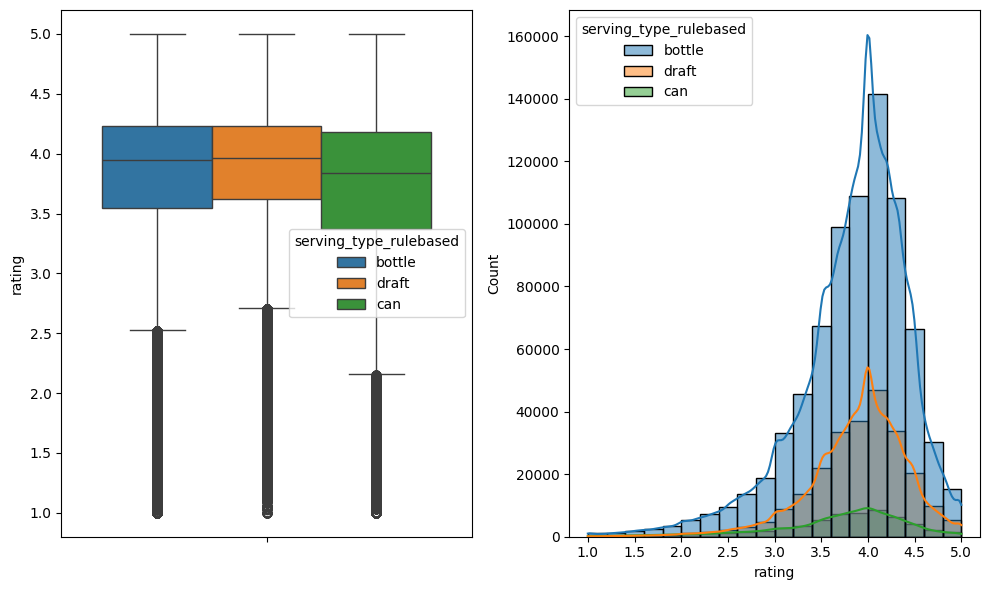

In [68]:
# show boxplot and histograms of ratings for bottle, can and draft
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(data=df, hue='serving_type_rulebased', y='rating')
plt.subplot(122)
sns.histplot(data=df, hue='serving_type_rulebased', x='rating', kde=True, bins=20)
plt.tight_layout()
plt.show()

## 5. Statistical Analysis 📈

### 5.1 Measure the impact of each aspect on rating 📏

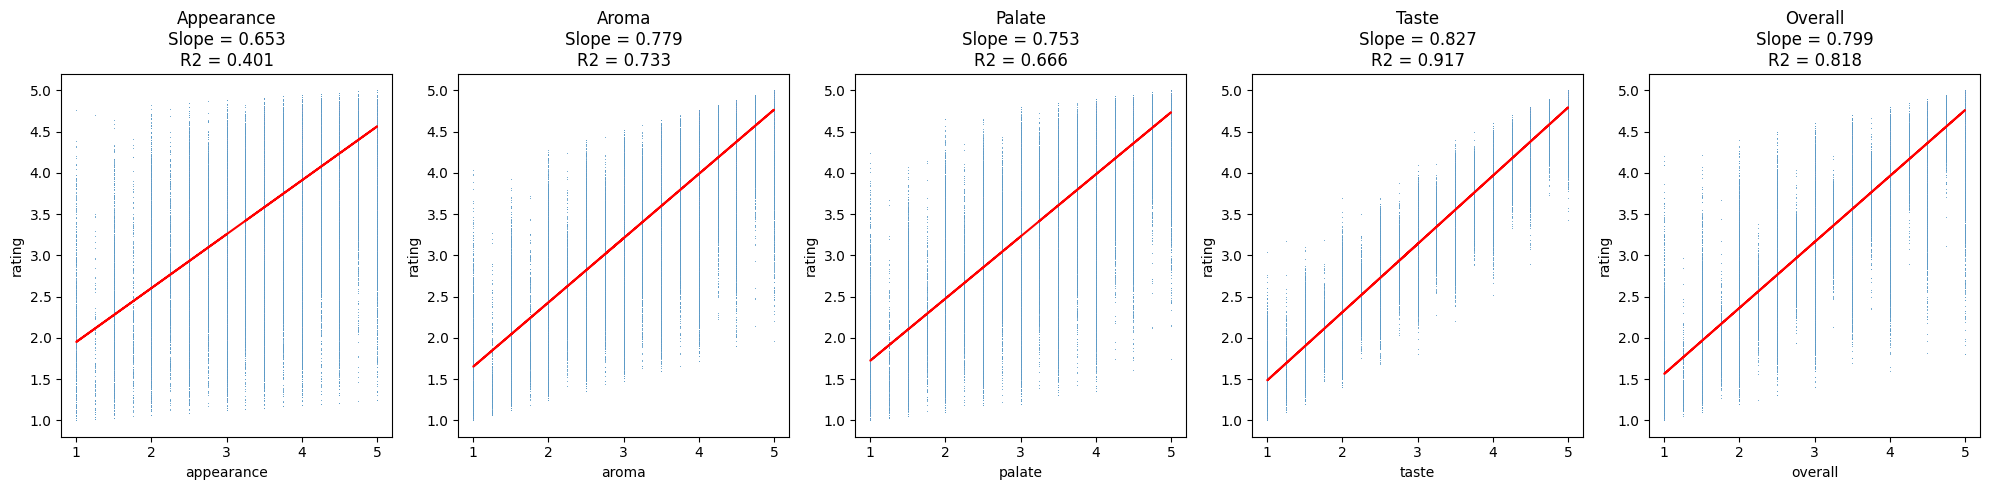

In [69]:
# fit a linear regression line to the data for all 5 aspects
reg1 = LinearRegression().fit(df[['appearance']], df['rating'])
reg2 = LinearRegression().fit(df[['aroma']], df['rating'])
reg3 = LinearRegression().fit(df[['palate']], df['rating'])
reg4 = LinearRegression().fit(df[['taste']], df['rating'])
reg5 = LinearRegression().fit(df[['overall']], df['rating'])

# create subplots for all 5 aspects
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# plot the data and regression line for each aspect
sns.scatterplot(data=df, x='appearance', y='rating', s=0.5, ax=axs[0])
axs[0].plot(df[['appearance']], reg1.predict(df[['appearance']]), color='red')
axs[0].set_title('Appearance\nSlope = ' + str(round(reg1.coef_[0], 3)) + '\nR2 = ' + str(round(reg1.score(df[['appearance']], df['rating']), 3)))

sns.scatterplot(data=df, x='aroma', y='rating', s=0.5, ax=axs[1])
axs[1].plot(df[['aroma']], reg2.predict(df[['aroma']]), color='red')
axs[1].set_title('Aroma\nSlope = ' + str(round(reg2.coef_[0], 3)) + '\nR2 = ' + str(round(reg2.score(df[['aroma']], df['rating']), 3)))

sns.scatterplot(data=df, x='palate', y='rating', s=0.5, ax=axs[2])
axs[2].plot(df[['palate']], reg3.predict(df[['palate']]), color='red')
axs[2].set_title('Palate\nSlope = ' + str(round(reg3.coef_[0], 3)) + '\nR2 = ' + str(round(reg3.score(df[['palate']], df['rating']), 3)))

sns.scatterplot(data=df, x='taste', y='rating', s=0.5, ax=axs[3])
axs[3].plot(df[['taste']], reg4.predict(df[['taste']]), color='red')
axs[3].set_title('Taste\nSlope = ' + str(round(reg4.coef_[0], 3)) + '\nR2 = ' + str(round(reg4.score(df[['taste']], df['rating']), 3)))

sns.scatterplot(data=df, x='overall', y='rating', s=0.5, ax=axs[4])
axs[4].plot(df[['overall']], reg5.predict(df[['overall']]), color='red')
axs[4].set_title('Overall\nSlope = ' + str(round(reg5.coef_[0], 3)) + '\nR2 = ' + str(round(reg5.score(df[['overall']], df['rating']), 3)))

plt.tight_layout()
plt.show()

# should still add confidence intervals

> It seems like Taste as the biggest impact on the rating while appearance has the least impact.

### 5.2 Hypothesis testing on the new labels

In [70]:
def do_ttest(type1, type2, category):
    ttest = ttest_ind(df[df['serving_type_rulebased'] == type1][category],df[df['serving_type_rulebased'] == type2][category])
    if ttest[1] > 0.05:
        print('The p-value is high (' + str(ttest[1]) + '), so we cannot reject the null hypothesis that the two samples have the same average')
    else:
        print('The p-value is very low (' + str(ttest[1]) + '), so we can reject the null hypothesis that the two samples have the same average')

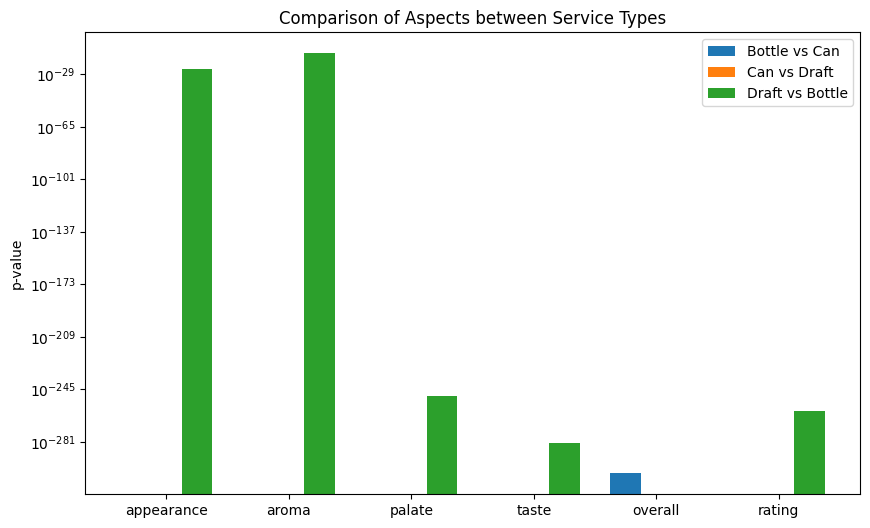

In [72]:
# define the columns to compare
columns = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']

# create an empty matrix to store the p-values
p_values = np.zeros((len(columns), 3))

# perform the t-test and store the p-values in the matrix
for i in range(len(columns)):
    ttest1 = ttest_ind(df[df['serving_type_rulebased'] == 'bottle'][columns[i]], df[df['serving_type_rulebased'] == 'can'][columns[i]])
    ttest2 = ttest_ind(df[df['serving_type_rulebased'] == 'can'][columns[i]], df[df['serving_type_rulebased'] == 'draft'][columns[i]])
    ttest3 = ttest_ind(df[df['serving_type_rulebased'] == 'draft'][columns[i]], df[df['serving_type_rulebased'] == 'bottle'][columns[i]])
    p_values[i][0] = ttest1[1]
    p_values[i][1] = ttest2[1]
    p_values[i][2] = ttest3[1]

# create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(columns))
width = 0.25
rects1 = ax.bar(x - width, p_values[:,0], width, label='Bottle vs Can')
rects2 = ax.bar(x, p_values[:,1], width, label='Can vs Draft')
rects3 = ax.bar(x + width, p_values[:,2], width, label='Draft vs Bottle')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(columns)
ax.set_ylabel('p-value')
ax.set_title('Comparison of Aspects between Service Types')
ax.legend()
plt.show()

> All the p-values are below 0.05, so we can reject the null hypothesis and conclude that there is a significant difference between the groups.